In [1]:
import time
import os.path
import requests
import pandas as pd

In [ ]:
# install DenMune clustering algorithm using pip command from the offecial Python repository, PyPi
# from https://pypi.org/project/denmune/
!pip install denmune

# now import it
from denmune.denmune import DenMune

In [3]:
dataset = 'jain' # let us take Jain dataset as an example

url = "https://zerobytes.one/denmune_data/"
file_ext = ".txt"
ground_ext = "-gt"

dataset_url = url + dataset + file_ext
groundtruth_url = url + dataset + ground_ext  + file_ext

data_path = 'data/' # change it to whatever you put your data, set it to ''; so it will retrive from current folder
if  not os.path.isfile(data_path + dataset + file_ext):
    req = requests.get(dataset_url)
    with open(data_path + dataset + file_ext, 'wb') as f:
        f.write(req.content)
        
if  not os.path.isfile(data_path + dataset + ground_ext + file_ext):
    req = requests.get(groundtruth_url)
    with open(data_path + dataset +  ground_ext + file_ext, 'wb') as f:
        f.write(req.content)       

using NGT, Proximity matrix has been calculated  in:  0.004446744918823242  seconds
Dataset's Groundtruht


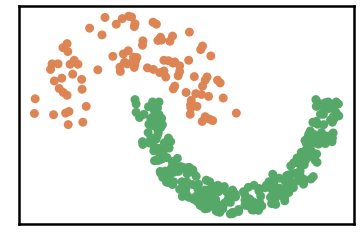



There are 0 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 121 clusters 



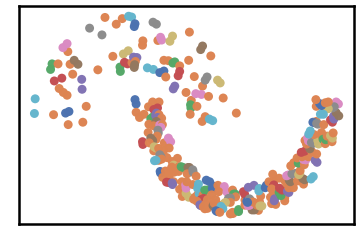

k= 1 :Validity score is: 0.3618319710010029 but best score is 0.3618319710010029 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.0031206607818603516  seconds
k= 2 :Validity score is: 0.1142039430014741 but best score is 0.3618319710010029 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.0639503002166748  seconds
k= 3 :Validity score is: 0.15552130458822808 but best score is 0.3618319710010029 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.003394603729248047  seconds
k= 4 :Validity score is: 0.33430436583186207 but best score is 0.3618319710010029 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.004367828369140625  seconds
k= 5 :Validity score is: 0.3252818002827062 but best score is 0.3618319710010029 at k= 1     

using NGT, Proximity matrix has been calculated  in:  0.0044400691986083984  seconds
There are 1 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 11 weak 

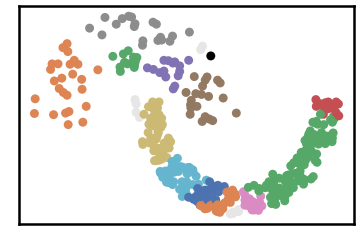

k= 6 :Validity score is: 0.49479283629096166 but best score is 0.49479283629096166 at k= 6     

using NGT, Proximity matrix has been calculated  in:  0.004199981689453125  seconds
There are 1 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 14 weak point(s) in light grey (noise of type-2) represent 4% of total points
DenMune detected 10 clusters 



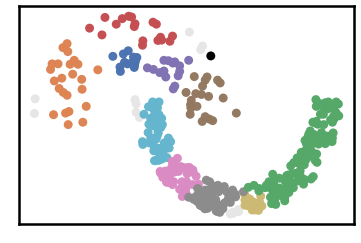

k= 7 :Validity score is: 0.5303473057065475 but best score is 0.5303473057065475 at k= 7     

using NGT, Proximity matrix has been calculated  in:  0.0043582916259765625  seconds
k= 8 :Validity score is: 0.5303473057065475 but best score is 0.5303473057065475 at k= 7     

using NGT, Proximity matrix has been calculated  in:  0.0042574405670166016  seconds
There are 1 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 7 weak point(s) in light grey (noise of type-2) represent 2% of total points
DenMune detected 8 clusters 



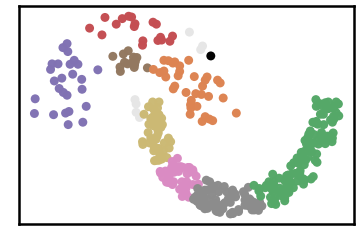

k= 9 :Validity score is: 0.5650927617291178 but best score is 0.5650927617291178 at k= 9     

using NGT, Proximity matrix has been calculated  in:  0.006439924240112305  seconds
k= 10 :Validity score is: 0.5650927617291178 but best score is 0.5650927617291178 at k= 9     

using NGT, Proximity matrix has been calculated  in:  0.004469394683837891  seconds
There are 1 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 4 weak point(s) in light grey (noise of type-2) represent 1% of total points
DenMune detected 3 clusters 



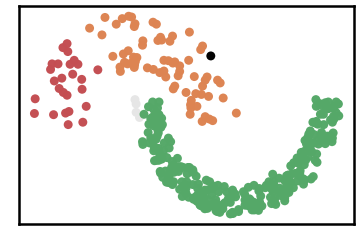

k= 11 :Validity score is: 0.9525543343949469 but best score is 0.9525543343949469 at k= 11     

using NGT, Proximity matrix has been calculated  in:  0.004948616027832031  seconds
k= 12 :Validity score is: 0.9525543343949469 but best score is 0.9525543343949469 at k= 11     

using NGT, Proximity matrix has been calculated  in:  0.004786968231201172  seconds
k= 13 :Validity score is: 0.9393375374258822 but best score is 0.9525543343949469 at k= 11     

using NGT, Proximity matrix has been calculated  in:  0.004767179489135742  seconds
k= 14 :Validity score is: 0.9466970842422527 but best score is 0.9525543343949469 at k= 11     

using NGT, Proximity matrix has been calculated  in:  0.00520777702331543  seconds
There are 0 outlier point(s) in black (noise of type-1) represent 0% of total points
There are 0 weak point(s) in light grey (noise of type-2) represent 0% of total points
DenMune detected 2 clusters 



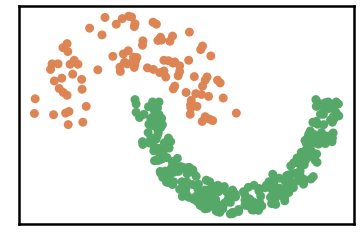

k= 15 :Validity score is: 1.0 but best score is 1.0 at k= 15     



<Figure size 432x288 with 0 Axes>

In [4]:
# Denmune's Paramaters
# DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_plot=show_plot, show_noise=show_noise)
verpose_mode = True # view in-depth analysis of time complexity and outlier detection, num of clusters
show_plot = True  # show plots on/off
show_noise = True # show noise and outlier on/off

# loop's parameters
start = 1
step = 1
end=15

# Validity indexes' parameters
validity_val = -1
best_k = 0
best_val = -1

validity_idx = 2 # Acc=1, F1-score=2,  NMI=3, AMI=4, ARI=5,  Homogeneity=6, and Completeness=7
df = pd.DataFrame(columns =['K', 'ACC', 'F1', 'NMI', 'AMI', 'ARI','Homogeneity', 'Completeness', 'Time' ])


for n in range(start, end+1, step):
    start_time = time.time()
    dm = DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode, show_noise=show_noise)
    labels_true, labels_pred = dm.output_Clusters()
    if show_plot == True and n==start:
        # Let us plot the groundtruth of this dataset which is reduced to 2-d using t-SNE
        print ("Dataset\'s Groundtruht")
        dm.plot_clusters(labels_true, ground=True)
        print('\n', "=====" * 20 , '\n')       
               
    end_time = time.time()
    
    validity_indexes = dm.validate_Clusters(labels_true, labels_pred)
    validity_val = validity_indexes[validity_idx]
    validity_indexes[0] = n
    validity_indexes[8] = end_time - start_time
    
    df = df.append(pd.Series(validity_indexes, index=df.columns ), ignore_index=True)
    
    if (best_val < validity_val):
        best_val = validity_val
        best_k = n
        # Let us show results where only an improve in accuracy is detected
        if show_plot:
            dm.plot_clusters(labels_pred, show_noise=show_noise)
    print ('k=' , n, ':Validity score is:', validity_val , 'but best score is', best_val, 'at k=', best_k , end='     ')
            
    if not verpose_mode:
        print('\r', end='')
    else:
        print('\n', "=====" * 20 , '\n')

In [5]:
# It is time to save the results
results_path = 'results/'  # change it to whatever you output results to, set it to ''; so it will output to current folder
para_file = 'denmune'+ '_para_'  + dataset + '.csv'
df.sort_values(by=['F1', 'NMI', 'ARI'] , ascending=False, inplace=True)   
df.to_csv(results_path + para_file, index=False, sep='\t', header=True)

In [6]:
df # it is sorted now and saved

,K,ACC,F1,NMI,AMI,ARI,Homogeneity,Completeness,Time
14,15.0,373.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.108786
10,11.0,342.0,0.952554,0.838168,0.836755,0.910509,1.000000,0.721419,0.039076
11,12.0,342.0,0.952554,0.838168,0.836755,0.910509,1.000000,0.721419,0.041489
13,14.0,340.0,0.946697,0.843630,0.842635,0.931329,1.000000,0.729550,0.044141
12,13.0,335.0,0.939338,0.785945,0.784184,0.896827,0.966271,0.662339,0.042259
9,10.0,147.0,0.565093,0.455403,0.450350,0.235531,0.977638,0.296838,0.121085
8,9.0,147.0,0.565093,0.444470,0.438782,0.229592,0.977638,0.287615,0.033598
7,8.0,136.0,0.530347,0.404531,0.397647,0.197351,0.959482,0.256294,0.033604
6,7.0,136.0,0.530347,0.403521,0.396629,0.197021,0.957316,0.255637,0.032912
5,6.0,123.0,0.494793,0.382028,0.374165,0.156875,0.975602,0.237518,0.034573
